In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#data source: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
dataset = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv")
dataset

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,"4,073,900",New York,40.723092,-73.844215,"1,027,431.148","202,756.7687",29.0,739,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,"4,097,300",New York,40.794111,-73.818679,"1,034,455.701","228,644.8374",19.0,973,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,"3,044,900",New York,40.717581,-73.936608,"1,001,822.831","200,716.8913",34.0,449,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,"3,044,900",New York,40.713537,-73.934456,"1,002,420.358","199,244.2531",34.0,449,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,"3,016,500",New York,40.666778,-73.975979,"990,913.775","182,202.426",39.0,165,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,"3,051,900",New York,40.713211,-73.954944,"996,740.686","199,121.6363",34.0,519,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,"4,070,700",New York,40.715194,-73.856650,"1,023,989.074","199,873.6475",29.0,707,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,"5,020,100",New York,40.620762,-74.136517,"946,351.4104","165,466.0763",50.0,201,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,"2,023,502",New York,40.850828,-73.903115,"1,011,053.646","249,271.9507",15.0,"23,502",2007757.0,2.028120e+09


In [ ]:
dataset.dtypes

tree_id               int64
block_id              int64
created_at           object
tree_dbh              int64
stump_diam            int64
curb_loc             object
status               object
health               object
spc_latin            object
spc_common           object
steward              object
guards               object
sidewalk             object
user_type            object
problems             object
root_stone           object
root_grate           object
root_other           object
trunk_wire           object
trnk_light           object
trnk_other           object
brch_light           object
brch_shoe            object
brch_other           object
address              object
postcode              int64
zip_city             object
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct             

In [ ]:
dataset['tree_id'] = dataset['tree_id'].astype(str)
dataset['block_id'] = dataset['block_id'].astype(str)

In [ ]:
dataset.dtypes

tree_id              object
block_id             object
created_at           object
tree_dbh              int64
stump_diam            int64
curb_loc             object
status               object
health               object
spc_latin            object
spc_common           object
steward              object
guards               object
sidewalk             object
user_type            object
problems             object
root_stone           object
root_grate           object
root_other           object
trunk_wire           object
trnk_light           object
trnk_other           object
brch_light           object
brch_shoe            object
brch_other           object
address              object
postcode              int64
zip_city             object
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct             

In [ ]:
dataset.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [ ]:
dataset_subset = dataset[['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems']]
dataset_subset

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None


In [ ]:
#checking null value
dataset_subset.isna().sum()

tree_id           0
block_id          0
created_at        0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
user_type         0
problems      31664
dtype: int64

In [ ]:
dataset_subset.dtypes

tree_id       object
block_id      object
created_at    object
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_latin     object
spc_common    object
steward       object
guards        object
sidewalk      object
user_type     object
problems      object
dtype: object

In [ ]:
dataset_subset[dataset_subset['health'].isna()]
#31616 rows

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems
37,211205,302080,09/09/2015,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN
57,187807,506266,08/29/2015,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
196,208322,222858,09/07/2015,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
209,209058,415850,09/08/2015,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN
239,203597,301947,09/04/2015,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,108193,08/18/2015,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
683695,170888,231931,08/24/2015,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN
683697,177922,410634,08/26/2015,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
683698,193791,208850,09/01/2015,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN


In [ ]:
dataset_subset['status'].value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [ ]:
dataset_subset[(dataset_subset['status']=='Stump') | (dataset_subset['status']=='Dead')]
#31615 rows

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems
37,211205,302080,09/09/2015,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN
57,187807,506266,08/29/2015,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
196,208322,222858,09/07/2015,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
209,209058,415850,09/08/2015,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN
239,203597,301947,09/04/2015,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,108193,08/18/2015,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
683695,170888,231931,08/24/2015,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN
683697,177922,410634,08/26/2015,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN
683698,193791,208850,09/01/2015,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN


In [ ]:
stump_dead =((dataset_subset['status']=='Stump') | (dataset_subset['status']=='Dead'))
stump_dead

0         False
1         False
2         False
3         False
4         False
          ...  
683783    False
683784    False
683785    False
683786    False
683787    False
Name: status, Length: 683788, dtype: bool

In [ ]:
dataset_subset.loc[stump_dead, 'health'].isna().sum()
#31615 out of 31616, high correlation

31615

In [ ]:
dataset_subset.loc[stump_dead, 'spc_latin'].isna().sum()
#31614 out of 31619, high correlation

31614

In [ ]:
#In conclusion, theres a high correlation between 'status' column and other columns with high missing value

In [ ]:
no_record_dead = dataset_subset[['spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk']].columns
no_record_dead

Index(['spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk'], dtype='object')

In [ ]:
dataset_subset.loc[stump_dead, no_record_dead] = dataset_subset.loc[stump_dead, no_record_dead].fillna('Not Recorded')
dataset_subset.loc[stump_dead, no_record_dead]
#according to the source, the dead tree is 'Not Recorded' in the following columns

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,spc_latin,spc_common,steward,guards,sidewalk
37,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
57,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
196,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
209,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
239,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
...,...,...,...,...,...
683693,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
683695,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
683697,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded
683698,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded


In [ ]:
dataset_subset.loc[stump_dead, ['health','problems']] = dataset_subset.loc[stump_dead, ['health','problems']].fillna('None')
dataset_subset.loc[stump_dead, ['health','problems']]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,health,problems
37,None,None
57,None,None
196,None,None
209,None,None
239,None,None
...,...,...
683693,None,None
683695,None,None
683697,None,None
683698,None,None


In [ ]:
dataset_subset.isna().sum()
#the rest can be filled with the most value counts

tree_id        0
block_id       0
created_at     0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
spc_common     5
steward        0
guards         1
sidewalk       1
user_type      0
problems      49
dtype: int64

In [ ]:
most_health = dataset_subset['health'].value_counts().index[0]
most_spc_latin = dataset_subset['spc_latin'].value_counts().index[0]
most_spc_common = dataset_subset['spc_common'].value_counts().index[0]
most_guards = dataset_subset['guards'].value_counts().index[0]
most_sidewalk = dataset_subset['sidewalk'].value_counts().index[0]
most_problems = dataset_subset['problems'].value_counts().index[0]
most_steward = dataset_subset['steward'].value_counts().index[0]
most_user_type = dataset_subset['user_type'].value_counts().index[0]

In [ ]:
dataset_subset['health'] = dataset_subset['health'].fillna(most_health)
dataset_subset['spc_latin'] = dataset_subset['spc_latin'].fillna(most_spc_latin)
dataset_subset['spc_common'] = dataset_subset['spc_common'].fillna(most_spc_common)
dataset_subset['guards'] = dataset_subset['guards'].fillna(most_guards)
dataset_subset['sidewalk'] = dataset_subset['sidewalk'].fillna(most_sidewalk)
dataset_subset['problems'] = dataset_subset['problems'].fillna(most_problems)
dataset_subset['steward'] = dataset_subset['steward'].fillna(most_steward)
dataset_subset['user_type'] = dataset_subset['user_type'].fillna(most_user_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
dataset_subset.isna().sum()
#CLEAR! No missing values!

tree_id       0
block_id      0
created_at    0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
user_type     0
problems      0
dtype: int64

In [ ]:
dataset_subset[((dataset_subset['status']=='Stump') | (dataset_subset['status']=='Dead'))
                & (dataset_subset['tree_dbh']>0)]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems
196,208322,222858,09/07/2015,10,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
209,209058,415850,09/08/2015,6,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,TreesCount Staff,None
266,210544,216081,09/08/2015,6,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
285,188609,107627,08/30/2015,9,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
430,189412,108374,08/30/2015,7,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,505510,08/29/2015,11,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
682823,155430,217978,08/18/2015,2,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
683346,156566,514686,08/18/2015,10,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
683693,156162,108193,08/18/2015,3,0,OffsetFromCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f2dac6890>,
      dtype=object)

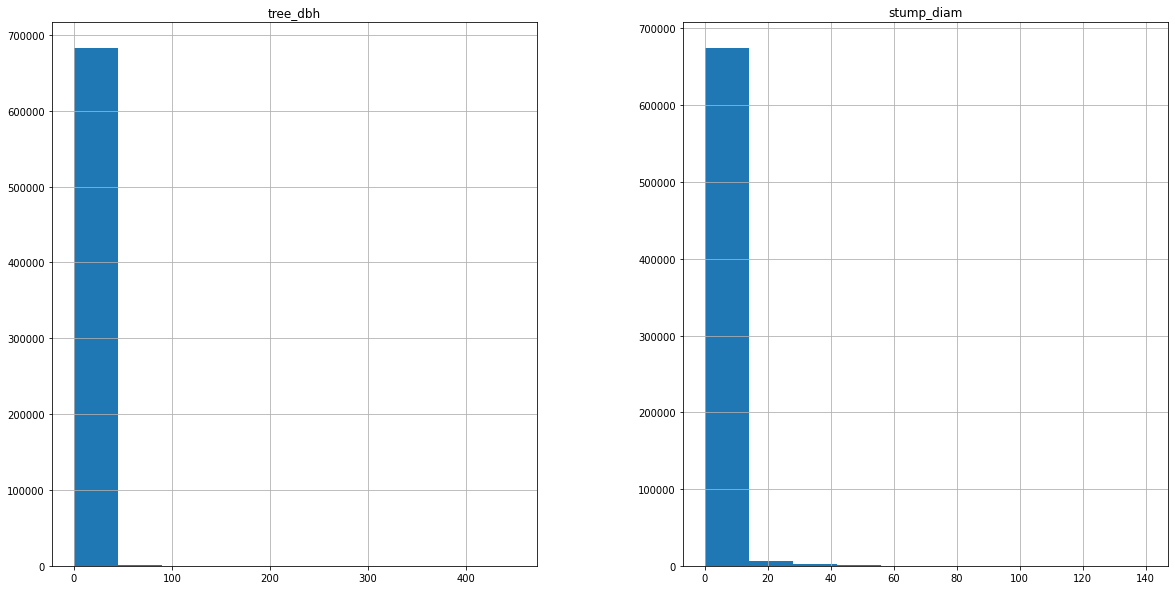

In [ ]:
#Cheking outliers
dataset_subset.hist(bins=10, figsize=(20,10))

In [ ]:
big_tree = dataset_subset[dataset_subset['tree_dbh']>50]
big_tree

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems
2405,168583,226040,08/23/2015,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,NYC Parks Staff,None
3738,199546,315695,09/03/2015,51,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,TreesCount Staff,Stones
4887,139665,409474,08/12/2015,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,TreesCount Staff,None
6724,209349,415127,09/08/2015,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None
10083,215075,515054,09/11/2015,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NoDamage,TreesCount Staff,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,322014,08/27/2015,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,Stones
677954,166796,348127,08/22/2015,54,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,Volunteer,Stones
679894,169501,312374,08/23/2015,51,0,OnCurb,Alive,Good,Quercus alba,white oak,None,None,NoDamage,Volunteer,BranchLights
681736,179366,349326,08/27/2015,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None


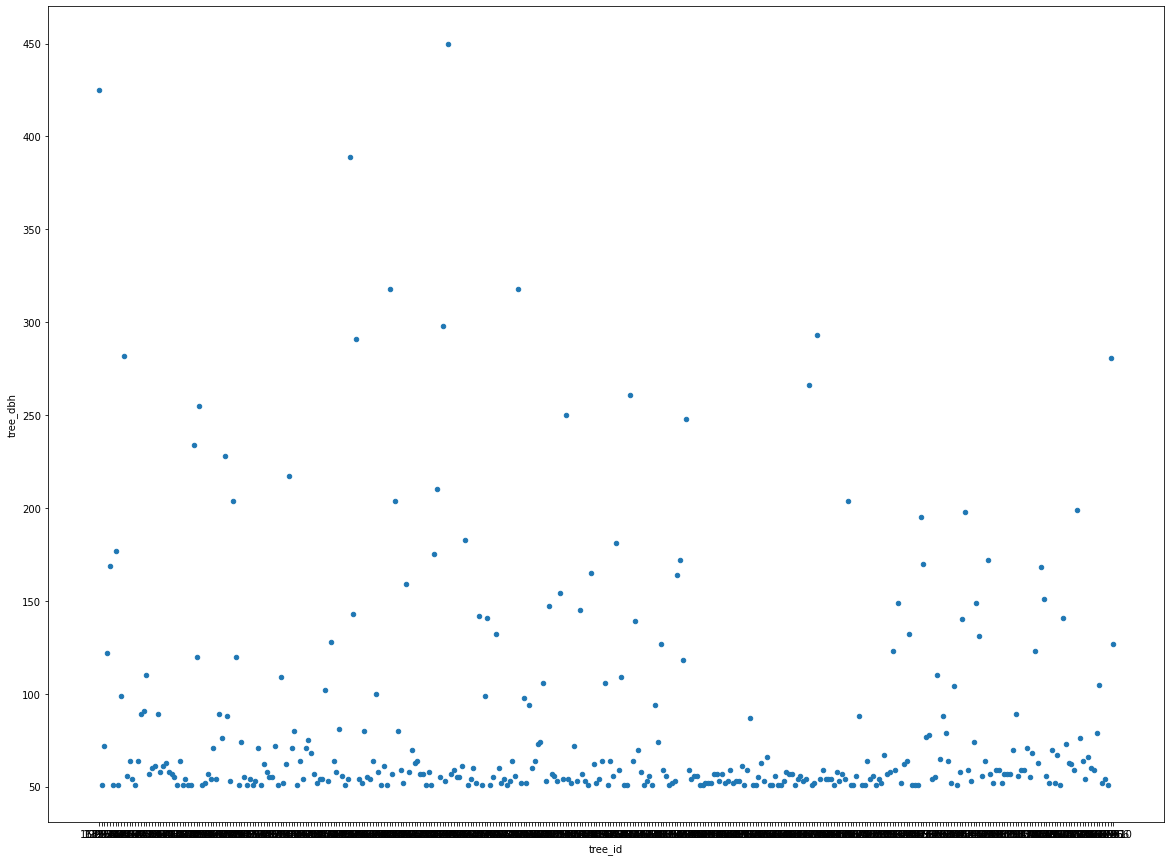

In [ ]:
big_tree.plot.scatter(x='tree_id', y='tree_dbh', figsize=(20,15))
#some tree sizes are too big

In [ ]:
dataset_subset.groupby('spc_latin').mean()

,tree_dbh,stump_diam
spc_latin,,
Acer,11.675424,0.0
Acer buergerianum,8.090909,0.0
Acer campestre,7.126275,0.0
Acer ginnala,7.869204,0.0
Acer griseum,3.509091,0.0
...,...,...
Tsuga canadensis,5.193182,0.0
Ulmus americana,11.953229,0.0
Ulmus parvifolia,7.417587,0.0


In [ ]:
tree_alive = dataset_subset[dataset_subset['status']=='Alive']
tree_alive

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None


In [ ]:
tree_dead_stump = dataset_subset[(dataset['status']=='Dead') | (dataset['status']=='Stump') ]
tree_dead_stump

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems
37,211205,302080,09/09/2015,0,16,OnCurb,Stump,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,TreesCount Staff,None
57,187807,506266,08/29/2015,0,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
196,208322,222858,09/07/2015,10,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
209,209058,415850,09/08/2015,6,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,TreesCount Staff,None
239,203597,301947,09/04/2015,0,15,OnCurb,Stump,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,108193,08/18/2015,3,0,OffsetFromCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
683695,170888,231931,08/24/2015,0,5,OnCurb,Stump,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,TreesCount Staff,None
683697,177922,410634,08/26/2015,0,17,OnCurb,Stump,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Volunteer,None
683698,193791,208850,09/01/2015,3,0,OnCurb,Dead,None,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,TreesCount Staff,None


In [ ]:
alive_subset = tree_alive.groupby('spc_latin')['tree_dbh'].describe().reset_index()[['spc_latin','25%','75%']]
alive_subset.rename(columns={'25%':'25%_dbh', '75%':'75%_dbh'}, inplace=True)
alive_subset

,spc_latin,25%_dbh,75%_dbh
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
127,Tsuga canadensis,2.0,7.0
128,Ulmus americana,4.0,17.0
129,Ulmus parvifolia,3.0,10.0
130,Ulmus pumila,4.0,17.0


In [ ]:
dead_stump_subset = tree_dead_stump.groupby('spc_latin')['stump_diam'].describe().reset_index()[['spc_latin','25%','75%']]
dead_stump_subset.rename(columns={'25%':'25%_stump', '75%':'75%_stump'}, inplace=True)
dead_stump_subset
#since most of stump species is not recorded, this data is insignificant

,spc_latin,25%_stump,75%_stump
0,Gleditsia triacanthos var. inermis,0.0,0.0
1,Not Recorded,0.0,16.0


In [ ]:
street_tree_census = dataset_subset.merge(alive_subset, left_on='spc_latin', right_on='spc_latin')
street_tree_census

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,25%_dbh,75%_dbh
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,5.0,14.0
1,184031,504204,08/29/2015,3,0,OnCurb,Alive,Good,Acer rubrum,red maple,1or2,None,NoDamage,TreesCount Staff,None,5.0,14.0
2,208974,414958,09/08/2015,10,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,5.0,14.0
3,198146,411699,09/02/2015,6,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,TreesCount Staff,Stones,5.0,14.0
4,198230,411696,09/02/2015,10,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,TreesCount Staff,"WiresRope,BranchLights",5.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652169,186489,505677,08/29/2015,4,0,OnCurb,Alive,Fair,Albizia julibrissin,mimosa,None,None,NoDamage,Volunteer,None,3.0,8.0
652170,554422,322905,04/22/2016,5,0,OnCurb,Alive,Good,Albizia julibrissin,mimosa,None,None,NoDamage,NYC Parks Staff,None,3.0,8.0
652171,108266,220755,08/01/2015,2,0,OnCurb,Alive,Good,Albizia julibrissin,mimosa,None,None,NoDamage,Volunteer,None,3.0,8.0
652172,150339,224055,08/16/2015,15,0,OnCurb,Alive,Good,Albizia julibrissin,mimosa,None,None,Damage,Volunteer,Stones,3.0,8.0


In [ ]:
low_limit = street_tree_census['tree_dbh'] < street_tree_census['25%_dbh']
high_limit = street_tree_census['tree_dbh'] > street_tree_census['75%_dbh']

In [ ]:
street_tree_census.loc[low_limit, 'tree_dbh'] = street_tree_census['25%_dbh']

In [ ]:
street_tree_census.loc[high_limit, 'tree_dbh'] = street_tree_census['75%_dbh']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ee714cb90>,
      dtype=object)

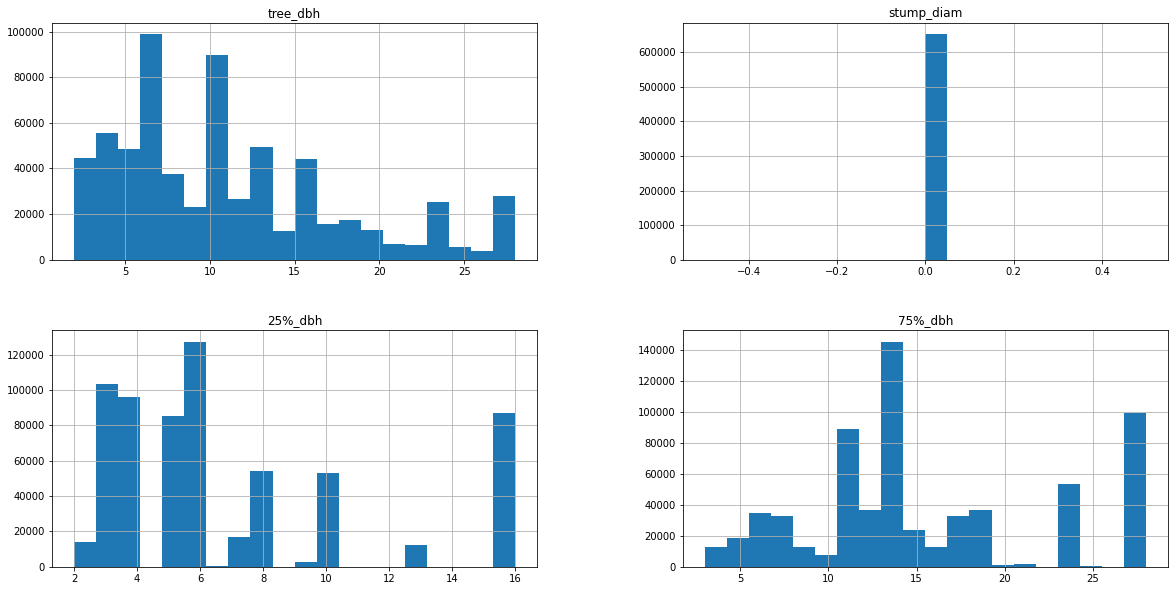

In [ ]:
street_tree_census.hist(bins=20, figsize=(20,10))
#the distribution seems right!